#  **Лабораторна робота №3**
##  Дерева прийняття рішень
##### Підгрупа №2
##### Виконала: Бранівська Валерія  ст.гр.КМ-23
---
Імпортування відповідних бібліотек Python.

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import graphviz 
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, make_scorer 
from sklearn import tree
from sklearn.tree import export_graphviz
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

1. Відкрити та зчитати наданий файл з даними.

In [3]:
df = pd.read_csv('ЛР3-пгр2.csv', sep=";")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


2. Визначити та вивести кількість записів та кількість полів у
завантаженому наборі даних.

In [4]:
print(f"Розмір: {df.size}")
print(f"Кількість рядків: {df.shape[0]}\nКількість стовпців: {df.shape[1]}\n")
print(f"Назви стовпців: {df.columns}")

Розмір: 19188
Кількість рядків: 1599
Кількість стовпців: 12

Назви стовпців: Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


3. Вивести перші 10 записів набору даних.

In [5]:
print(f"Перші 10 записів набору: \n {df.head(10)}")

Перші 10 записів набору: 
    fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   
5            7.4              0.66         0.00             1.8      0.075   
6            7.9              0.60         0.06             1.6      0.069   
7            7.3              0.65         0.00             1.2      0.065   
8            7.8              0.58         0.02             2.0      0.073   
9            7.5              0.50         0.36             6.1      0.071   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  

4. Розділити набір даних на навчальну (тренувальну) та тестову вибірки.

In [8]:
train, test = train_test_split(df, test_size=0.2, random_state=42)

In [8]:
print(train.head(5))

     fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
493            8.7             0.690         0.31             3.0      0.086   
354            6.1             0.210         0.40             1.4      0.066   
342           10.9             0.390         0.47             1.8      0.118   
834            8.8             0.685         0.26             1.6      0.088   
705            8.4             1.035         0.15             6.0      0.073   

     free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
493                 23.0                  81.0  1.00020  3.48       0.74   
354                 40.5                 165.0  0.99120  3.25       0.59   
342                  6.0                  14.0  0.99820  3.30       0.75   
834                 16.0                  23.0  0.99694  3.32       0.47   
705                 11.0                  54.0  0.99900  3.37       0.49   

     alcohol  quality  
493     11.6        6  
354     11.9  

In [9]:
print(test.head(5))

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
803             7.7              0.56         0.08            2.50      0.114   
124             7.8              0.50         0.17            1.60      0.082   
350            10.7              0.67         0.22            2.70      0.107   
682             8.5              0.46         0.31            2.25      0.078   
1326            6.7              0.46         0.24            1.70      0.077   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
803                  14.0                  46.0   0.9971  3.24       0.66   
124                  21.0                 102.0   0.9960  3.39       0.48   
350                  17.0                  34.0   1.0004  3.28       0.98   
682                  32.0                  58.0   0.9980  3.33       0.54   
1326                 18.0                  34.0   0.9948  3.39       0.60   

      alcohol  quality  
803       9.6        6  


5. Використовуючи відповідні функції бібліотеки scikit-learn, збудувати класифікаційну модель дерева прийняття рішень глибини 5 та навчити її на тренувальній вибірці, вважаючи, що в наданому наборі даних цільова характеристика визначається останнім стовпчиком, а всі інші виступають в ролі вихідних аргументів.

In [15]:
x_train = train.iloc[:, :-1]  # вихідні аргументи
y_train = train.iloc[:, -1]   # цільова хар-ка -> quality

x_test = test.iloc[:, :-1]
y_test = test.iloc[:, -1]

model = tree.DecisionTreeClassifier(max_depth=5, random_state=42)

model.fit(x_train, y_train)


6. Представити графічно побудоване дерево за допомогою бібліотеки
graphviz.

In [10]:
dot_data = export_graphviz(
    model,
    out_file=None,
    feature_names=x_train.columns,
    class_names=[str(cls) for cls in sorted(y_train.unique())],
    filled=True,
    rounded=True,
    special_characters=True
)

graph = graphviz.Source(dot_data)
graph.render("decision_tree", format="pdf", cleanup=True) 
graph.view()

'decision_tree.pdf'

7. Обчислити класифікаційні метрики збудованої моделі для тренувальної та тестової вибірки. Представити результати роботи моделі на тестовій вибірці графічно. Порівняти результати, отриманні при застосуванні різних критеріїв розщеплення: інформаційний приріст на основі ентропії чи неоднорідності Джині.

In [39]:
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

# Метрики з output_dict=True
report_train = classification_report(y_train, y_pred_train, output_dict=True, zero_division=1)
report_test = classification_report(y_test, y_pred_test, output_dict=True, zero_division=1)

# Вивід у консоль
print(" === Метрики для тренувальної вибірки === ")
print(f"Accuracy: {accuracy_score(y_train, y_pred_train):.4f}")
print("Звіт класифікації:")
print(classification_report(y_train, y_pred_train, zero_division=1))

print("\n === Метрики для тестової вибірки === ")
print(f"Accuracy: {accuracy_score(y_test, y_pred_test):.4f}")
print("Звіт класифікації:")
print(classification_report(y_test, y_pred_test, zero_division=1))


 === Метрики для тренувальної вибірки === 
Accuracy: 0.6724
Звіт класифікації:
              precision    recall  f1-score   support

           3       1.00      0.00      0.00         9
           4       0.80      0.09      0.17        43
           5       0.66      0.85      0.74       551
           6       0.69      0.59      0.64       506
           7       0.65      0.57      0.61       157
           8       1.00      0.00      0.00        13

    accuracy                           0.67      1279
   macro avg       0.80      0.35      0.36      1279
weighted avg       0.68      0.67      0.65      1279


 === Метрики для тестової вибірки === 
Accuracy: 0.5594
Звіт класифікації:
              precision    recall  f1-score   support

           3       1.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.59      0.76      0.67       130
           6       0.55      0.49      0.52       132
           7       0.45      0.

<Figure size 1000x600 with 0 Axes>

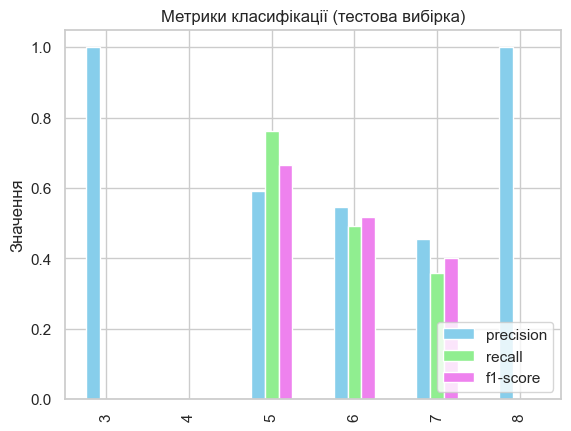

In [40]:
report_test_df = pd.DataFrame(report_test).transpose()
classes = [label for label in report_test_df.index if label.isdigit()]
metrics_test_df = report_test_df.loc[classes, ['precision', 'recall', 'f1-score']]

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Тестова вибірка
metrics_test_df.plot(kind='bar', color=['skyblue', 'lightgreen', 'violet'])
plt.title('Метрики класифікації (тестова вибірка)')
plt.ylabel('Значення')
plt.ylim(0, 1.05)
plt.legend(loc='lower right')
plt.show()

In [25]:
# Модель з критерієм Джині
model_gini = tree.DecisionTreeClassifier(max_depth=5, criterion='gini', random_state=42)
model_gini.fit(x_train, y_train)

# Модель з критерієм ентропії
model_entropy = tree.DecisionTreeClassifier(max_depth=5, criterion='entropy', random_state=42)
model_entropy.fit(x_train, y_train)

y_pred_gini = model_gini.predict(x_test)
y_pred_entropy = model_entropy.predict(x_test)

print("=== Джині ===")
print("Accuracy:", accuracy_score(y_test, y_pred_gini))
print(classification_report(y_test, y_pred_gini, zero_division=1))

print("\n=== Ентропія ===")
print("Accuracy:", accuracy_score(y_test, y_pred_entropy))
print(classification_report(y_test, y_pred_entropy, zero_division=1))

=== Джині ===
Accuracy: 0.559375
              precision    recall  f1-score   support

           3       1.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.59      0.76      0.67       130
           6       0.55      0.49      0.52       132
           7       0.45      0.36      0.40        42
           8       1.00      0.00      0.00         5

    accuracy                           0.56       320
   macro avg       0.60      0.27      0.26       320
weighted avg       0.54      0.56      0.54       320


=== Ентропія ===
Accuracy: 0.578125
              precision    recall  f1-score   support

           3       1.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.63      0.72      0.67       130
           6       0.57      0.55      0.56       132
           7       0.48      0.48      0.48        42
           8       0.00      0.00      0.00         5

    acc

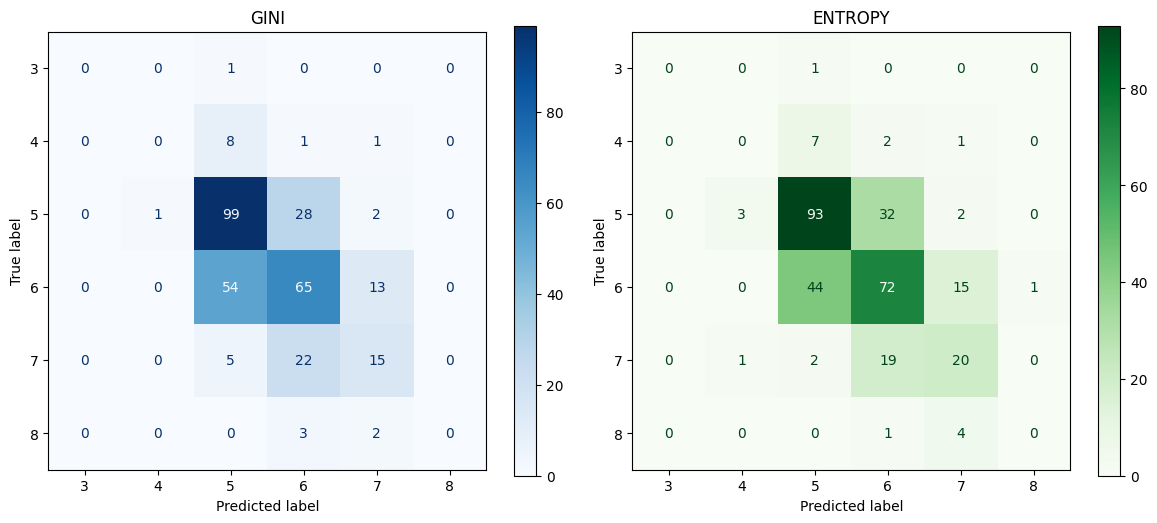

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
ConfusionMatrixDisplay.from_estimator(model_gini, x_test, y_test, ax=axes[0], cmap="Blues")
axes[0].set_title("GINI")
ConfusionMatrixDisplay.from_estimator(model_entropy, x_test, y_test, ax=axes[1], cmap="Greens")
axes[1].set_title("ENTROPY")
plt.tight_layout()
plt.show()

8. З’ясувати вплив глибини дерева та мінімальної кількості елементів в листі дерева на результати класифікації. Результати представити
графічно.

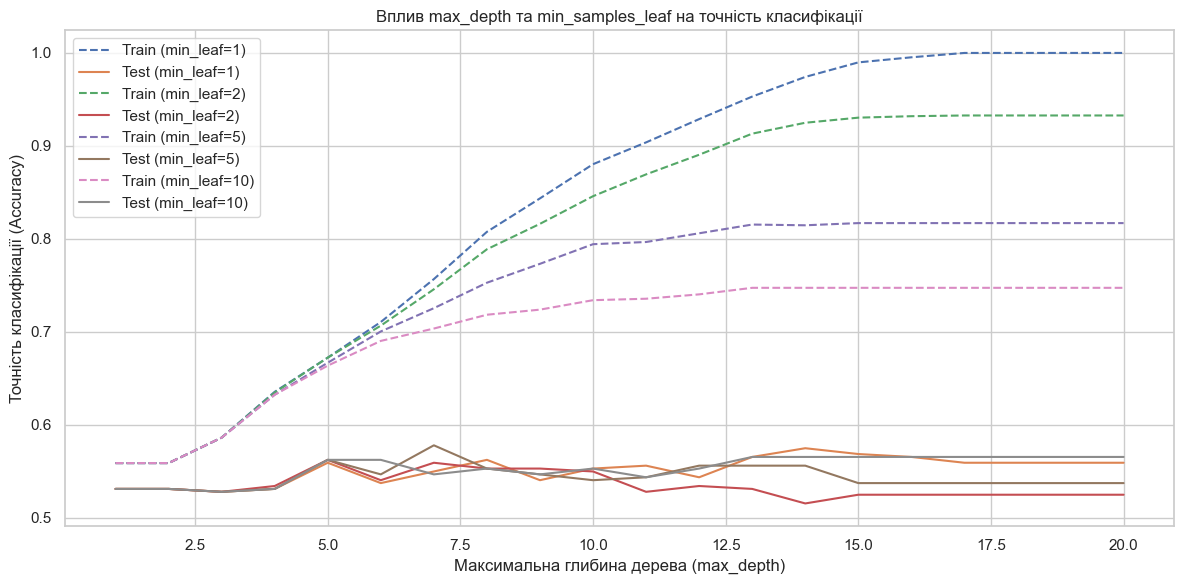

In [38]:
# Параметри для аналізу
max_depths = range(1, 21)
min_samples_leafs = [1, 2, 5, 10]

# Для збереження результатів
results = {}

# Обхід усіх комбінацій
for min_samples_leaf in min_samples_leafs:
    train_scores = []
    test_scores = []
    for depth in max_depths:
        clf = tree.DecisionTreeClassifier(max_depth=depth, min_samples_leaf=min_samples_leaf, random_state=42)
        clf.fit(x_train, y_train)
        train_scores.append(accuracy_score(y_train, clf.predict(x_train)))
        test_scores.append(accuracy_score(y_test, clf.predict(x_test)))
    
    results[min_samples_leaf] = {
        "train": train_scores,
        "test": test_scores
    }

# Побудова графіків
plt.figure(figsize=(12, 6))
for min_samples_leaf, scores in results.items():
    plt.plot(max_depths, scores["train"], linestyle='--', label=f"Train (min_leaf={min_samples_leaf})")
    plt.plot(max_depths, scores["test"], linestyle='-', label=f"Test (min_leaf={min_samples_leaf})")

plt.xlabel("Максимальна глибина дерева (max_depth)")
plt.ylabel("Точність класифікації (Accuracy)")
plt.title("Вплив max_depth та min_samples_leaf на точність класифікації")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Чи є перенавчання (великий розрив між train/test)

Оптимальне значення max_depth для кожного min_samples_leaf

Надмірно мілке дерево (низька точність на всьому)

Надмірно глибоке дерево (висока точність на train, але низька на test)

9. Навести стовпчикову діаграму важливості атрибутів, які
використовувалися для класифікації (див. feature_importances_).
Пояснити, яким чином – на Вашу думку – цю важливість можна
підрахувати

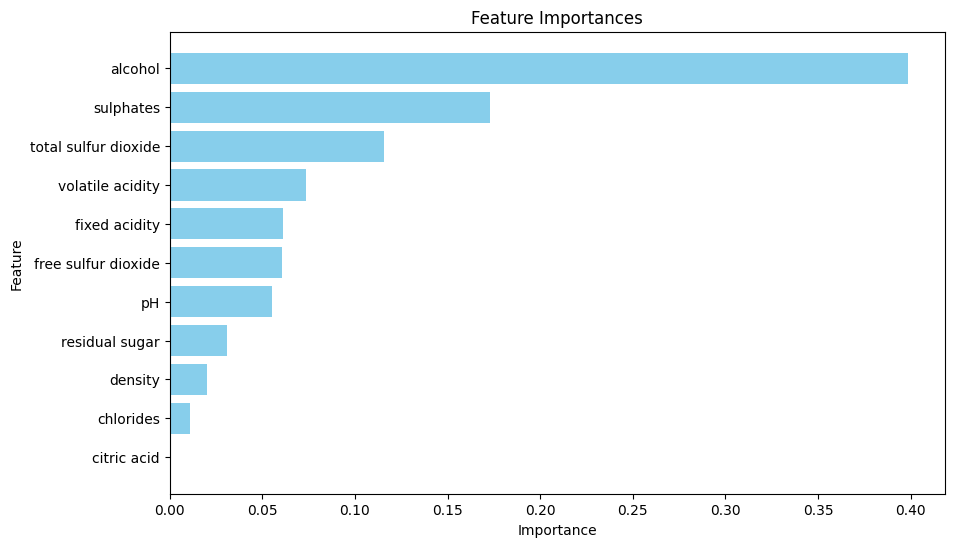

In [28]:
feature_importances = model.feature_importances_

feature_names = x_train.columns 
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis() 
plt.show()

 feature_importances_ - показує важливість кожного ознакового атрибута у процесі прийняття рішень.Це масив довжиною, що дорівнює кількості ознак, де кожне значення — це оцінка важливості атрибута. Чим вище значення — тим більший вклад атрибут внесла в побудову дерева (і точність класифікації).
 
Кожен раз, коли дерево розбиває вузол за певним атрибутом, воно намагається максимально зменшити міру "неоднорідності" (impurity).
 
Атрибути з великою вагою суттєво впливають на розділення класів.Якщо важливість майже рівна нулю, то атрибут або не використовувалась, або вклад дуже малий. Таке визначення важливості допомагає видалити зайве, зробити моделі простішими.